In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
from Data_train import epoch 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
import numpy as np

create_epoch_date = epoch.create_epoch_date

model = XGBRegressor(tree_method='hist')
# X, Y = create_epoch()




# with open("Data_train/Saved/arrayX.txt", "a") as arrayX:
#           np.savetxt(arrayX, X, delimiter=",", fmt='%.4f')

# with open("Data_train/Saved/arrayY.txt", "a") as arrayY:
#           np.savetxt(arrayY, Y, delimiter=",", fmt='%.4f')


/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [3]:
X = np.loadtxt("/home/it/Desktop/NTMINH/Data/Data/data_train/arrayX_train_30_30_30_7_days_pred_7_days_2020.txt", delimiter=",")
Y = np.loadtxt("/home/it/Desktop/NTMINH/Data/Data/data_train/arrayY_train_30_30_30_7_days_pred_7_days_2020.txt", delimiter=",")

In [4]:
X = X[:, :30]

In [5]:
# Giữ lại một số sku để test
sku_test = 103
sku_train = round(X.shape[0]/329.0 - sku_test)

In [6]:

day_temp = 329

In [7]:
# split data into train and test sets
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = X[:sku_train*day_temp], X[sku_train*day_temp:], Y[:sku_train*day_temp], Y[sku_train*day_temp:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(263200, 30)
(33887, 30)
(263200, 7)
(33887, 7)


In [8]:
model.fit(X_train, y_train)
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [9]:
# make predictions for test data
y_pred = model.predict(X_test)

In [10]:
np.sqrt(np.square(np.subtract(y_test, y_pred))).sum()/y_test.shape[0]

9.262618139660844

In [11]:
y_pred_int = np.asarray(y_pred, dtype = np.int32)
y_pred_int[y_pred_int < 0] = 0

In [12]:

print('Số lượng lable > 0',len(y_test[y_test > 0]))
print('Số lượng lable == 0',len(y_test[y_test == 0]))

print('Số lượng pred > 0',len(y_pred_int[y_pred_int > 0]))
print('Số lượng pred == 0',len(y_pred_int[y_pred_int == 0]))
print('Số lượng pred == 0',len(y_pred_int[y_pred_int < 0]))

Số lượng lable > 0 113675
Số lượng lable == 0 123534
Số lượng pred > 0 100578
Số lượng pred == 0 136631
Số lượng pred == 0 0


In [13]:
# Tỉ lệ khi label = 0 và dự đoán đoán đúng

total = len(y_test[y_test == 0])
acc = ((y_test == 0) & (y_pred_int == 0)).sum()
acc/total

0.817264882542458

In [14]:
# Tỉ lệ đoán khác 0 khi dữ liệu thật khác 0

total = len(y_test[y_test != 0])
acc = ((y_test != 0) & (y_pred_int != 0)).sum()
acc/total

0.6862018913569387

In [15]:
condition = np.where(y_test != 0)
np.sqrt(np.square(np.subtract(y_test[condition], y_pred[condition]))).sum()/y_test.shape[0]

6.3304696393952

In [16]:
print(np.max(np.subtract(y_test[condition], y_pred[condition])))
print(np.min(np.subtract(y_test[condition], y_pred[condition])))

225.19482696056366
-135.66127014160156


<AxesSubplot:>

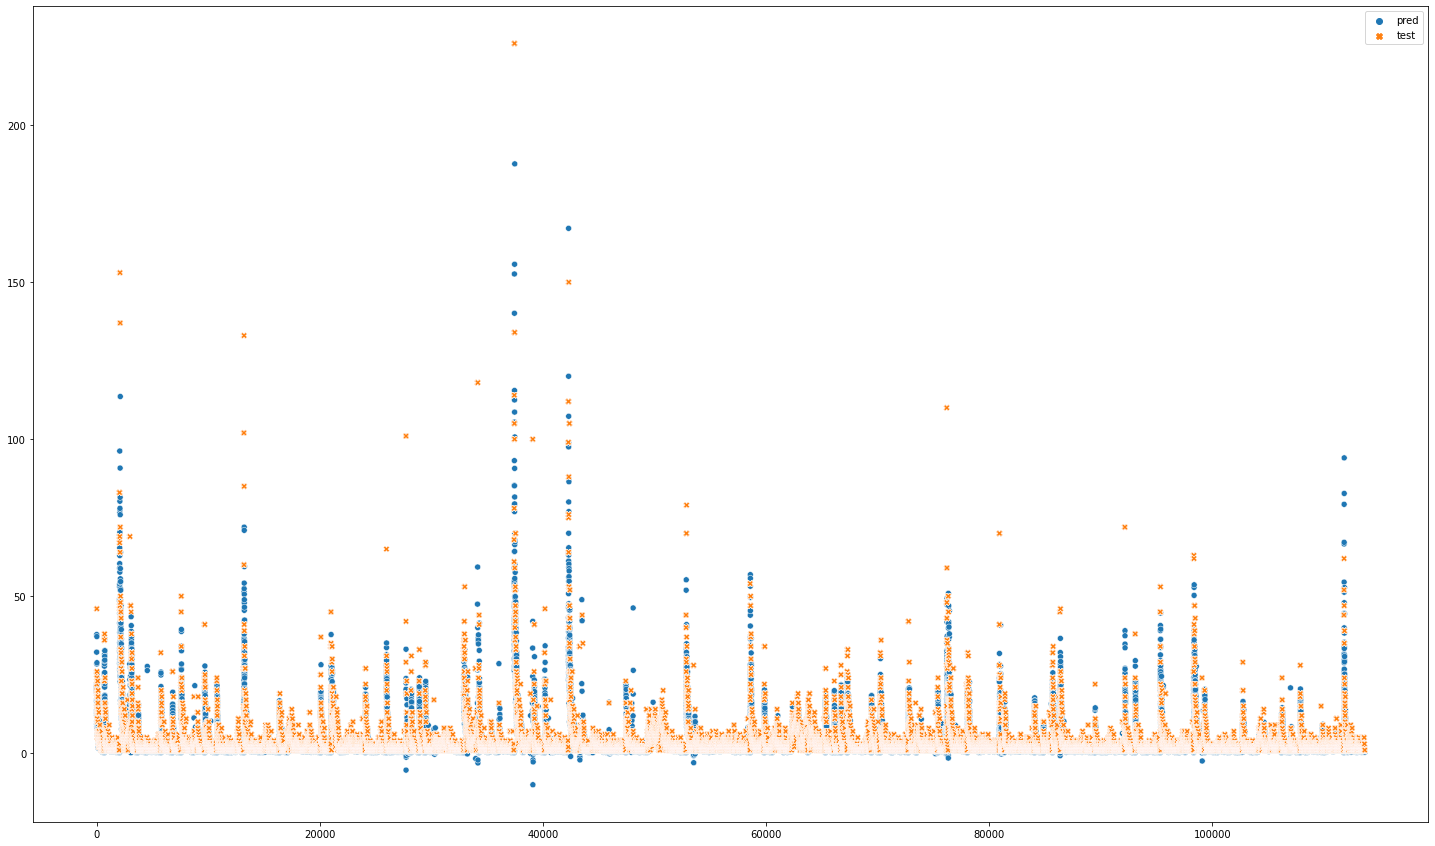

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
condition = np.where(y_test != 0)

df = pd.DataFrame({ 'pred': y_pred[condition],
                    'test':  y_test[condition]})

fig, ax = plt.subplots(figsize = (25, 15))
sns.scatterplot(data = df, ax = ax)

In [18]:
X_test.shape[0]/103

329.0

In [19]:
round(np.random.rand()*100)

55

In [20]:
num = round(np.random.rand()*100)


temp = X_test[day_temp*num + 50:60 + day_temp*num, :17].copy()
print(temp)

temp = y_test[day_temp*num + 50:60 + day_temp*num].copy()
print(temp)


[[ 5.  7.  5.  2.  6.  8.  3.  4.  4.  7.  5.  3.  9.  5.  3. 11.  1.]
 [ 7.  5.  2.  6.  8.  3.  4.  4.  7.  5.  3.  9.  5.  3. 11.  1.  5.]
 [ 5.  2.  6.  8.  3.  4.  4.  7.  5.  3.  9.  5.  3. 11.  1.  5.  6.]
 [ 2.  6.  8.  3.  4.  4.  7.  5.  3.  9.  5.  3. 11.  1.  5.  6.  3.]
 [ 6.  8.  3.  4.  4.  7.  5.  3.  9.  5.  3. 11.  1.  5.  6.  3.  3.]
 [ 8.  3.  4.  4.  7.  5.  3.  9.  5.  3. 11.  1.  5.  6.  3.  3.  4.]
 [ 3.  4.  4.  7.  5.  3.  9.  5.  3. 11.  1.  5.  6.  3.  3.  4.  6.]
 [ 4.  4.  7.  5.  3.  9.  5.  3. 11.  1.  5.  6.  3.  3.  4.  6.  3.]
 [ 4.  7.  5.  3.  9.  5.  3. 11.  1.  5.  6.  3.  3.  4.  6.  3.  3.]
 [ 7.  5.  3.  9.  5.  3. 11.  1.  5.  6.  3.  3.  4.  6.  3.  3.  1.]]
[[2. 6. 4. 4. 3. 2. 5.]
 [6. 4. 4. 3. 2. 5. 7.]
 [4. 4. 3. 2. 5. 7. 5.]
 [4. 3. 2. 5. 7. 5. 4.]
 [3. 2. 5. 7. 5. 4. 2.]
 [2. 5. 7. 5. 4. 2. 6.]
 [5. 7. 5. 4. 2. 6. 5.]
 [7. 5. 4. 2. 6. 5. 5.]
 [5. 4. 2. 6. 5. 5. 5.]
 [4. 2. 6. 5. 5. 5. 8.]]


<AxesSubplot:>

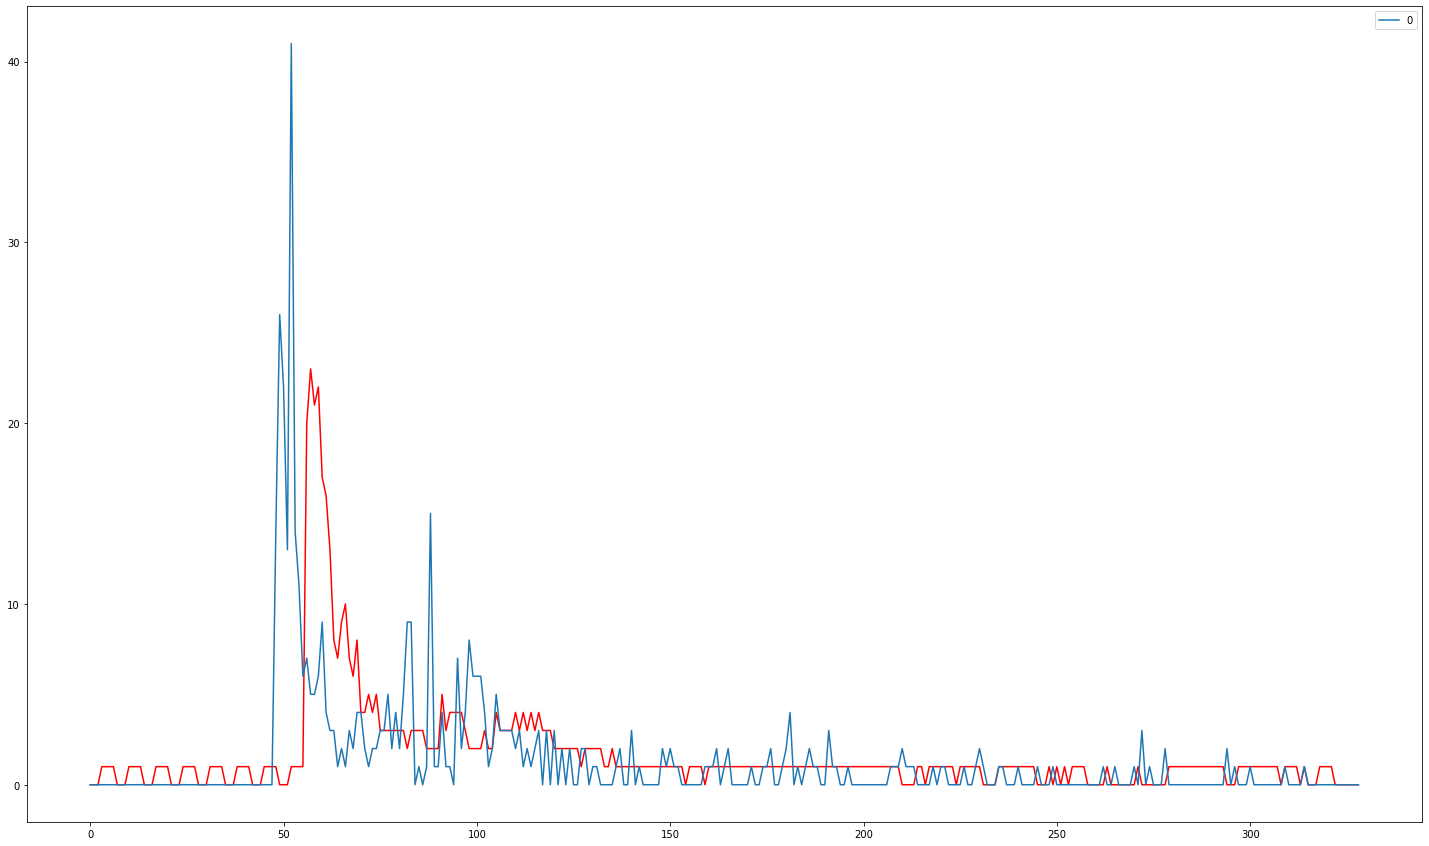

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'test':  np.random.rand(5)})
df2 = pd.DataFrame({'test':  np.random.rand(5)})

num = round(np.random.rand()*100)

temp = X_test[day_temp*num:day_temp + day_temp*num].copy()
result = y_test[day_temp*num:day_temp + day_temp*num, 6:7].copy()
temp.shape

fig, ax = plt.subplots(figsize = (25, 15))

array = np.zeros(shape = (day_temp, day_temp))
array[:] = np.nan

for i in range(0, day_temp - 7, 7):
          predict = model.predict([temp[i]])

          array[i, i:i+7] = np.round(predict)

array = np.nan_to_num(array)

array = np.sum(array, axis = 0)
sns.lineplot(data = array, ax = ax, color = 'red')

# for row in range(array.shape[0]):
#           sns.lineplot(data = array[row], ax = ax)

sns.lineplot(data = result, ax = ax)

In [22]:
def tracking_signal(y_test, y_pred):
          temp1 = np.multiply(np.sum(np.subtract(y_test, y_pred), axis=1), 7)
          temp2 = np.sum(np.abs(np.subtract(y_test, y_pred)), axis = 1)

          result = np.divide(temp1, temp2)
          return result
          pass

sum_int_pred = np.sum(y_pred_int, axis = 1)
sum_int_test = np.sum(y_test, axis = 1)
sum_int_error = np.sum(np.sqrt(np.square(np.subtract(y_pred_int, y_test))), axis = 1)
sum_error = np.sum(np.sqrt(np.square(np.subtract(y_pred, y_test))), axis = 1)
sum_int_error_per_day = np.sum(np.sqrt(np.square(np.subtract(y_pred_int, y_test))), axis = 1)/7
sum_error_per_day = np.sum(np.sqrt(np.square(np.subtract(y_pred, y_test))), axis = 1)/7
sum_error_boolean = np.sum(y_test == y_pred_int, axis = 1)/7
sum_error_sum  = np.abs(np.subtract(sum_int_pred, sum_int_test))
sum_error_tracking_signal = tracking_signal(y_test, y_pred)

In [23]:
# Xác định tăng giảm của đơn hàng trong ngày
y_test_6_day = y_test[:, :6].copy()
x_test_1_day = X_test[:, 29:30].copy()
pre_7_day = np.concatenate((x_test_1_day, y_test_6_day), axis = 1)
pre_7_day.shape

is_higher = y_test >= pre_7_day
is_higher_predict = y_pred_int >= pre_7_day
is_lower = y_test <= pre_7_day
is_lower_predict = y_pred_int <= pre_7_day


sum_acc_higher, soluonghigher = np.sum(is_higher_predict & is_higher, axis = 1), np.sum(is_higher, axis = 1)
sum_acc_lower, soluonglower = np.sum(is_lower_predict & is_lower, axis = 1), np.sum(is_lower, axis = 1)


# Dự đoán bán và không bán
def khongban(a, b):
          temp1 = a == 0
          temp2 = b == 0

          return np.sum(temp1 & temp2, axis = 1), np.sum(temp1, axis = 1)


def coban(a, b):
          temp1 = (a != 0)
          temp2 = (b != 0)

          return np.sum(temp1 & temp2, axis = 1), np.sum(temp1, axis = 1)

doandungkhongban, soluogkhongban = khongban(y_test, y_pred_int)
doandungcoban, soluogcoban = coban(y_test, y_pred_int)


In [24]:
threshold = 50
condition = sum_int_test > threshold
print(f'Có {len(sum_int_test[condition])} sản phẩm thỏa điều kiện > {threshold}')
print(f'Độ lỗi sum_int_error trung bình ở {threshold} là:',sum_int_error[condition].mean())
print(f'Độ lỗi sum_error trung bình ở {threshold} là:',sum_error[condition].mean())
print(f'Độ lỗi sum_int_error_per_day trung bình ở {threshold} là:',sum_int_error_per_day[condition].mean())
print(f'Độ lỗi sum_error_per_day trung bình ở {threshold} là:',sum_error_per_day[condition].mean())
print(f'Độ lỗi sum_error_tracking_signal trung bình ở {threshold} là:',sum_error_tracking_signal[condition].mean())
# print(f'Độ lỗi sum_error_boolean trung bình ở {threshold} là:',sum_error_boolean[condition].mean())
print(f'Độ lỗi sum_error_sum trung bình ở {threshold} là:',sum_error_sum[condition].mean())
print(f'Độ lỗi sum_acc_higher trung bình ở {threshold} là:',sum_acc_higher[condition].sum()/soluonghigher[condition].sum())
print(f'Độ lỗi sum_acc_lower trung bình ở {threshold} là:',sum_acc_lower[condition].sum()/soluonglower[condition].sum())
print(f'Đoán đúng không bán trung bình ở {threshold} là:',doandungkhongban[condition].sum()/soluogkhongban[condition].sum())
print(f'Đoán đúng có bán trung bình ở {threshold} là:',doandungcoban[condition].sum()/soluogcoban[condition].sum())

Có 1622 sản phẩm thỏa điều kiện > 50
Độ lỗi sum_int_error trung bình ở 50 là: 56.83415536374846
Độ lỗi sum_error trung bình ở 50 là: 55.947543782817085
Độ lỗi sum_int_error_per_day trung bình ở 50 là: 8.119165051964066
Độ lỗi sum_error_per_day trung bình ở 50 là: 7.992506254688155
Độ lỗi sum_error_tracking_signal trung bình ở 50 là: 2.558307270856002
Độ lỗi sum_error_sum trung bình ở 50 là: 45.301479654747226
Độ lỗi sum_acc_higher trung bình ở 50 là: 0.5899245159172957
Độ lỗi sum_acc_lower trung bình ở 50 là: 0.8316985832165654
Đoán đúng không bán trung bình ở 50 là: 0.7646017699115044
Đoán đúng có bán trung bình ở 50 là: 0.8972101214199648


In [25]:
threshold = 0
condition = sum_int_test >= threshold
print(f'Có {len(sum_int_test[condition])} sản phẩm thỏa điều kiện >= {threshold}')
print(f'Độ lỗi sum_int_error trung bình ở {threshold} là:',sum_int_error[condition].mean())
print(f'Độ lỗi sum_error trung bình ở {threshold} là:',sum_error[condition].mean())
print(f'Độ lỗi sum_int_error_per_day trung bình ở {threshold} là:',sum_int_error_per_day[condition].mean())
print(f'Độ lỗi sum_error_per_day trung bình ở {threshold} là:',sum_error_per_day[condition].mean())
print(f'Độ lỗi sum_error_tracking_signal trung bình ở {threshold} là:',sum_error_tracking_signal[condition].mean())
# print(f'Độ lỗi sum_error_boolean trung bình ở {threshold} là:',sum_error_boolean[condition].mean())
print(f'Độ lỗi sum_error_sum trung bình ở {threshold} là:',sum_error_sum[condition].mean())
print(f'Độ lỗi sum_acc_higher trung bình ở {threshold} là:',sum_acc_higher[condition].sum()/soluonghigher.sum())
print(f'Độ lỗi sum_acc_lower trung bình ở {threshold} là:',sum_acc_lower[condition].sum()/soluonglower.sum())
print(f'Đoán đúng không bán trung bình ở {threshold} là:',doandungkhongban[condition].sum()/soluogkhongban.sum())
print(f'Đoán đúng có bán trung bình ở {threshold} là:',doandungcoban[condition].sum()/soluogcoban.sum())

# Với những ngày bán lớn hơn một lượng hàng thì chênh lệch là bao nhiêu
# Làm một độ đo xem là nhựng cực trí cực đại cực tiểu trong khỏang 3 ngày của predict có trùng với test hay không.


Có 33887 sản phẩm thỏa điều kiện >= 0
Độ lỗi sum_int_error trung bình ở 0 là: 8.066692241862661
Độ lỗi sum_error trung bình ở 0 là: 9.262618139660844
Độ lỗi sum_int_error_per_day trung bình ở 0 là: 1.15238460598038
Độ lỗi sum_error_per_day trung bình ở 0 là: 1.323231162808692
Độ lỗi sum_error_tracking_signal trung bình ở 0 là: -2.222094421205842
Độ lỗi sum_error_sum trung bình ở 0 là: 5.966653879068669
Độ lỗi sum_acc_higher trung bình ở 0 là: 0.8562251191716926
Độ lỗi sum_acc_lower trung bình ở 0 là: 0.9211077166779814
Đoán đúng không bán trung bình ở 0 là: 0.817264882542458
Đoán đúng có bán trung bình ở 0 là: 0.6862018913569387


In [26]:
def find_max_min_local(series, threshold = 20):
        """
            Input: 
                series: list
            Return:
                list of index
        """
        result = []
        for i in range(1, len(series) - 1):
            if series[i] > series[i - 1] and series[i] > series[i + 1]:
                temp = series[i]*2 - series[i - 1] - series[i + 1]
                if temp > threshold:
                    result.append(i)
            # elif series[i] < series[i - 1] and series[i] < series[i + 1]: 
            #     temp = series[i - 1] + series[i + 1] - series[i]*2
            #     if temp > threshold:
            #         result.append(i)
        return result

def mo_rong_pham_vi(test_max):
    temp = test_max.copy()
    for index in temp:
            test_max.append(index+1)
            test_max.append(index-1)
    return test_max


total_model = 0
total_pred = 0
correct = 0

true_positive = 0 # The model predicted a label and matches correctly as per ground truth.
true_negative = 0  # The model does not predict the label and is not a part of the ground truth.
false_positive = 0 # The model predicted a label, but it is not a part of the ground truth (Type I Error).
false_negative = 0 # The model does not predict a label, but it is part of the ground truth. (Type II Error).

for i in range(len(y_test)):
    test_max = find_max_min_local(y_test[i], 50)
    # Cộng số ngày cực đại vào total
    total_model = len(test_max)

    test_pred = find_max_min_local(y_pred[i], 20)
    # Mở rộng phạm vi để lấy số ngày trùng nhau giữa dự đoán và groundtruth
    test_pred = mo_rong_pham_vi(test_pred)
    total_pred = len(set(test_pred))

    # Đếm số ngày trùng nhau
    true_positive += len(np.intersect1d(test_max,test_pred))
    false_positive += total_pred - len(np.intersect1d(test_max,test_pred))
    true_negative += 0
    false_negative += total_model - len(np.intersect1d(test_max,test_pred))

print("Ngưỡng cực đại test: 50, ở pred là 20")
print('Tỉ lệ cực đại trùng precision:',true_positive/(true_positive + false_positive))
print('Tỉ lệ cực đại trùng recall:',true_positive/(true_positive + false_negative))

Ngưỡng cực đại test: 50, ở pred là 20
Tỉ lệ cực đại trùng precision: 0.06563706563706563
Tỉ lệ cực đại trùng recall: 0.18085106382978725


In [27]:
total_model = 0
total_pred = 0
correct = 0

true_positive = 0 # The model predicted a label and matches correctly as per ground truth.
true_negative = 0  # The model does not predict the label and is not a part of the ground truth.
false_positive = 0 # The model predicted a label, but it is not a part of the ground truth (Type I Error).
false_negative = 0 # The model does not predict a label, but it is part of the ground truth. (Type II Error).

for i in range(len(y_test)):
    test_max = find_max_min_local(y_test[i], 200)
    # Cộng số ngày cực đại vào total
    total_model = len(test_max)

    test_pred = find_max_min_local(y_pred[i], 100)
    # Mở rộng phạm vi để lấy số ngày trùng nhau giữa dự đoán và groundtruth
    test_pred = mo_rong_pham_vi(test_pred)
    total_pred = len(set(test_pred))

    # Đếm số ngày trùng nhau
    true_positive += len(np.intersect1d(test_max,test_pred))
    false_positive += total_pred - len(np.intersect1d(test_max,test_pred))
    true_negative += 0
    false_negative += total_model - len(np.intersect1d(test_max,test_pred))


print("Ngưỡng cực đại test: 200, ở pred là 100")
print('Tỉ lệ cực đại trùng precision:',true_positive/(true_positive + false_positive))
print('Tỉ lệ cực đại trùng recall:',true_positive/(true_positive + false_negative))


Ngưỡng cực đại test: 200, ở pred là 100
Tỉ lệ cực đại trùng precision: 0.16666666666666666
Tỉ lệ cực đại trùng recall: 0.1


In [28]:
from scipy import stats

total_model = 0
total_pred = 0
correct = 0

true_positive = 0 # The model predicted a label and matches correctly as per ground truth.
true_negative = 0  # The model does not predict the label and is not a part of the ground truth.
false_positive = 0 # The model predicted a label, but it is not a part of the ground truth (Type I Error).
false_negative = 0 # The model does not predict a label, but it is part of the ground truth. (Type II Error).

for num in range(int(len(y_test)/day_temp)):
          temp_test = y_test[day_temp*num:day_temp + day_temp*num:7].copy()
          temp_pred = y_pred[day_temp*num:day_temp + day_temp*num:7].copy()

          zscore_temp = np.abs(stats.zscore(temp_test, axis = None)) > 5
          zscore_pred = np.abs(stats.zscore(temp_pred, axis = None)) > 4

          total_model = zscore_temp.sum()
          total_pred = zscore_pred.sum()

          correct = (zscore_pred[zscore_temp == True] == True).sum()

          true_positive += correct
          false_positive += total_pred - correct
          true_negative += 0
          false_negative += total_model - correct

print("Ngưỡng cực đại test: 5, ở pred là 4 (t-distribution)")
print('Tỉ lệ đột biến trùng precision:',true_positive/(true_positive + false_positive))
print('Tỉ lệ đột biến trùng recall:',true_positive/(true_positive + false_negative))

Ngưỡng cực đại test: 5, ở pred là 4 (t-distribution)
Tỉ lệ đột biến trùng precision: 0.19736842105263158
Tỉ lệ đột biến trùng recall: 0.38461538461538464
